In [98]:
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt
import textblob as blob
import numpy as np
import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

TO DO:
- Scan account every five minutes for new mentions
- If mentioned, then grab twitter handle in tweet (maybe using @ as trigger)
- *** Function: Check to see whether that handle has already been analyze (if so, Tweet that it’s already been analyzed)
- Move credentials to a config file
- Store tweeter and thank in status message

In [133]:
# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [134]:
user = "@realDonaldTrump"

In [135]:
#Function that gets the last 500 tweets from that handle and analyzes those tweets using VaderSentiment

def lookup_handle(target_user):
#     """Looks up the user(s) last 500 tweets
#     limit to one user lookup at a time (if multiple users wrap in a for loop)
# Loop through each user
    # Variables for holding sentiments
    counter = 0
    
    compound_list = []
    tweets_ago_list = []

    # Use cursor to loop through 50 pages (total 500 tweets)
    for page in tweepy.Cursor(api.user_timeline, id=user).pages(50):
        # page is a list of statuses
        for tweet in page:
            tweet_text = json.dumps(tweet._json, indent=3)
            tweet = json.loads(tweet_text)
            text = tweet['text']
            # print(text)

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(text)["compound"]

            # Add each value to the appropriate array
            compound_list.append(compound)
            tweets_ago_list.append(counter)
            
            counter = counter - 1
            
    return compound_list, tweets_ago_list, user


In [136]:
compound_list, tweets_ago_list, user = lookup_handle(user)
print(compound_list)
print(tweets_ago_list)
print(user)

[0.6731, 0.0, -0.2942, 0.0, 0.128, -0.3818, 0.4926, 0.3612, 0.0, 0.2481, -0.3382, 0.4543, 0.5106, 0.1027, -0.1759, -0.765, 0.8225, 0.9255, 0.7906, 0.0, 0.4723, -0.6369, -0.1531, 0.0, 0.0, -0.0516, 0.7712, 0.7783, 0.0258, 0.9099, 0.7717, -0.4199, -0.2256, -0.3182, 0.8313, 0.6124, 0.0, -0.3071, 0.0, 0.5411, -0.4574, -0.296, 0.6239, -0.4767, 0.0, -0.3999, -0.7184, 0.6249, 0.9168, 0.4767, -0.4017, 0.8955, 0.7783, 0.8056, 0.6249, 0.296, 0.5857, 0.1516, 0.0, 0.3716, -0.0516, 0.8779, 0.8528, 0.4215, 0.0772, 0.4767, 0.1742, 0.0, -0.836, -0.1531, 0.835, -0.1779, 0.8074, 0.0, 0.6271, 0.5411, 0.7322, -0.5423, 0.0173, -0.25, 0.2732, -0.4003, 0.8074, 0.6908, 0.2263, 0.5859, -0.4588, 0.5574, 0.8607, 0.7264, 0.8316, 0.0, 0.4295, -0.1779, 0.802, 0.0258, 0.8176, -0.7579, -0.7783, 0.0, -0.34, 0.0, -0.6597, 0.0, 0.0, -0.6801, -0.128, 0.0, -0.7823, 0.0258, -0.296, 0.0, 0.2401, 0.0, 0.0, -0.8188, 0.2846, -0.5267, -0.5574, -0.6597, -0.0258, -0.3818, 0.2263, -0.7964, -0.4767, -0.765, 0.7096, 0.5719, 0.1531, 

In [137]:
# Function to Plot VaderSentiment Graph
def plot(x_axis, y_axis, user):
    date = datetime.datetime.now().strftime("%m-%d-%y")
    plt.figure(figsize=(8, 6))
    plt.xlim((-500,0))
    plt.title("Sentiment Analysis of " + user + " (" + date + ")")
    plt.xlabel("Tweets Ago")
    plt.ylabel("Tweet Polarity")

    plt.plot(x_axis, y_axis, marker="o", color="red", linewidth=.25)
    
    plt.show()


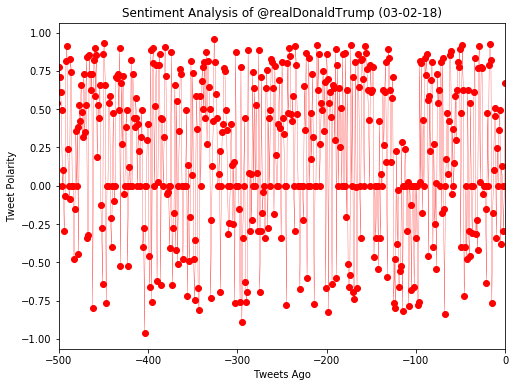

In [138]:
figure = plot(tweets_ago_list, compound_list, user)

In [139]:
# Tweet out VaderSentiment Graph and Thanks to original twitter
def tweet_analysis(filename, user):
    msg = "Analysis of " + user
    api.update_with_media(filename, status=msg)

In [140]:
image = user + ".png"
tweet_analysis(image, user)